# Real Time Detection 
Prototype V1
By: Xiaochi (George) Li

## Requirement

`conda install xxx`

1. CV2
2. h5py

In [2]:
# import cv2
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
model_dir = '../Prototype/trained_model/'
label2expression = {1: "Surprise",2: "Fear",3: "Disgust",4: "Happiness",
                    5: "Sadness", 6: "Anger",7: "Neutral"}

In [5]:
model_file = 'first_model.h5'
model = load_model(model_dir+model_file)

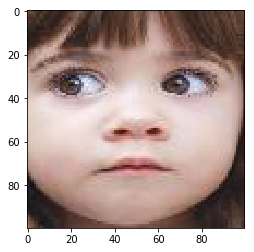

In [29]:
test_dir = '../RAFDB/aligned/'
test_image = 'test_0002_aligned.jpg'
img = Image.open(test_dir+test_image).convert('RGB')
imshow(img)
img = np.array(img).reshape((1,100,100,3))
img = img/255

In [35]:
prediction = model.predict(img)
print(prediction)
prediction_max = np.argmax(prediction)
print('prediction:', label2expression[prediction_max+1])

[[0.11280647 0.01441015 0.05347699 0.38625422 0.16025057 0.04466195
  0.22813964]]
prediction: Happiness


## Real time detection

597 203 266 266


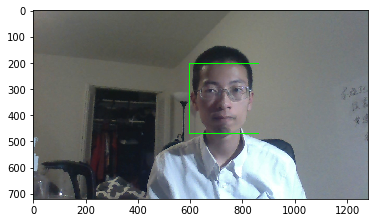

In [28]:
import cv2
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
frame = cv2.imread('sample_1.jpg')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
RGB_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.03,
        minNeighbors=5,
        minSize=(150,150)
    )
for (x, y, w, h) in faces:
    cropped = RGB_frame[y:y+h, x:x+w]
    print(x,y,w,h)
    cv2.rectangle(RGB_frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

imshow(RGB_frame)


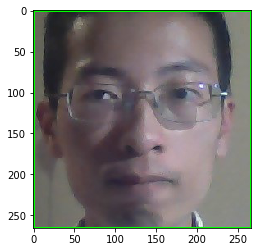

In [29]:
imshow(cropped)

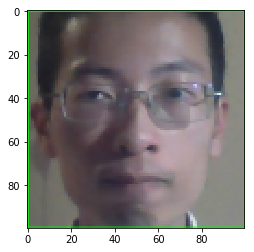

In [31]:
resized = cv2.resize(cropped, (100,100), interpolation = cv2.INTER_AREA)
imshow(resized)


In [44]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow

def prediction(img):
    """
    prediction function
    By: Xiaochi (George) Li
    Dec.2018
    :parameter
        img: size(100,100,3)
    :return
        predict: String of best predict
        detail: dict of probabilty of all emotions
    """

    model_dir = '../Prototype/trained_model/'
    label2expression = {1: "Surprise", 2: "Fear", 3: "Disgust", 4: "Happiness",
                        5: "Sadness", 6: "Anger", 7: "Neutral"}
    model_file = 'first_model.h5'
    model = load_model(model_dir + model_file)

    img = np.array(img).reshape((1, 100, 100, 3))
    img = img / 255

    prediction = model.predict(img)
    detail = {}
    for i in range(7):
        detail[label2expression[i+1]] = prediction[0][i]
    prediction_max = np.argmax(prediction)
    predict = label2expression[prediction_max + 1]
    return predict, detail


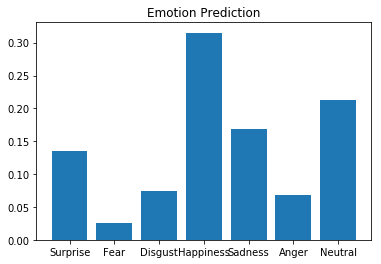

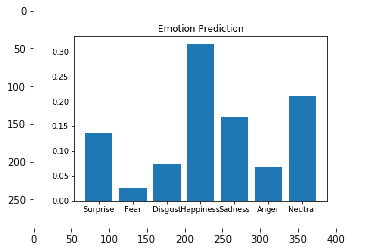

In [90]:
import numpy as np
import matplotlib.pyplot as plt
result = prediction(resized)
value = np.array([result[1][i] for i in result[1]])
label = ["Surprise", "Fear", "Disgust","Happiness","Sadness","Anger","Neutral"]
fig, ax = plt.subplots()
ax.bar(range(len(value)),value, tick_label=label)
ax.set_title('Emotion Prediction')
fig.canvas.draw()

# grab the pixel buffer and dump it into a numpy array
X = np.array(fig.canvas.renderer._renderer)

# now display the array X as an Axes in a new figure
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, frameon=False)
ax2.imshow(X)
plt.show()

In [66]:
result = prediction(resized)
detail_string = result[0] + '\n' +'\n'
for i in result[1]:
    detail_string += i+':'+str(result[1][i])+'\n'

print(detail_string)

Happiness

Surprise:0.13522366
Fear:0.0252718
Disgust:0.07497899
Happiness:0.31513375
Sadness:0.1683498
Anger:0.068900034
Neutral:0.21214204



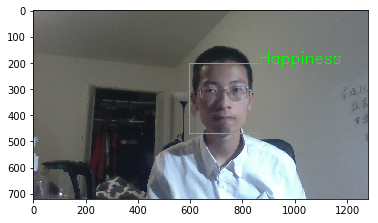

In [71]:
RGB_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cv2.rectangle(RGB_frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(RGB_frame, result[0], (x+w, y), font, 2, (0, 255, 0), 2, cv2.LINE_AA)
# cv2.putText(RGB_frame, detail_string, (100, 100), font, 2, (0, 255, 0), 2, cv2.LINE_AA)
imshow(RGB_frame)